### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

RANDOM_SEED =7124
LABELS = ["Normal", "Fraud"]

Using TensorFlow backend.


In [2]:
# Reading the data and lookng at the structure of the data. This data has 30 attributes and 1 lakh records
data = pd.read_csv("Fraud_data_amtstd.csv")
data.shape

(100000, 30)

0    99508
1      492
Name: Class, dtype: int64


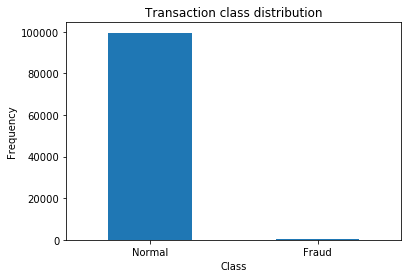

In [3]:
#PLotting the frequencies of fraud and non-fraud transactions in the data
count_classes = pd.value_counts(data['Class'], sort = True)
print(count_classes)

#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0)

#Giving titles and labels to the plot
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [4]:
#Looking at a sample of records
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.836500,-0.545419,-0.462979,0.537174,-0.426143,-0.100606,-0.584764,-0.103956,2.268429,-0.365185,...,0.085111,0.410736,0.137625,0.602906,-0.350260,0.464407,-0.070917,-0.030486,0.049882,0
1,-4.289880,-2.576061,-0.092256,1.976405,2.810033,-2.669128,-0.981883,-0.470310,-0.025692,0.099528,...,-0.473240,-0.307295,-2.789549,0.578976,-0.837979,0.372843,0.353451,-1.662202,-0.347171,0
2,1.131318,0.139818,0.586921,1.069291,-0.334908,-0.204938,-0.135526,0.043821,-0.121117,0.182139,...,-0.028126,-0.167062,-0.048054,-0.009912,0.417694,-0.479793,0.024360,0.023878,-0.208963,0
3,-0.866956,1.373947,1.948343,2.686750,-0.366790,0.568632,-0.278349,0.739536,-1.655955,0.708396,...,0.022719,-0.070619,-0.080307,0.000816,0.092167,0.159131,0.157940,-0.014370,-0.253595,0
4,-0.842670,1.401843,0.927235,1.070402,0.843883,0.467333,0.366716,0.616739,-1.586963,0.000041,...,0.036573,-0.182581,-0.226834,-1.029794,-0.118762,-0.228960,-0.024250,0.046547,-0.346230,0
5,1.178458,0.166055,-0.101567,0.369453,0.017198,-0.722891,0.396639,-0.187978,-0.483147,0.083094,...,-0.323048,-1.083814,0.049838,-0.002872,0.295810,0.135883,-0.074191,0.004364,-0.150527,0
6,1.869017,-0.202287,-0.218739,1.496434,-0.403332,-0.013593,-0.342586,0.129402,0.911017,0.149568,...,-0.458963,-1.058509,0.439679,-0.066668,-0.376792,-1.125226,0.053537,-0.039380,-0.305050,0
7,1.335053,0.331464,-2.057763,-0.346175,2.583234,2.854102,-0.187547,0.685154,-0.286614,-0.535903,...,-0.191820,-0.650118,-0.114069,0.915936,0.730073,0.383879,-0.031902,0.029849,-0.347171,0
8,1.787763,-0.737892,-0.185794,0.362758,-0.550775,0.676564,-0.932369,0.390445,1.349983,-0.136095,...,0.331025,1.223539,0.264791,-0.541170,-0.571339,0.812785,0.017984,-0.054691,-0.232691,0
9,-1.055540,0.942471,0.986697,1.560551,-0.138755,-0.253645,0.622974,-0.321826,-0.215914,0.816454,...,0.153985,0.985031,0.204281,0.455561,-0.456576,-0.244140,-0.833487,-0.419773,-0.173549,0


In [5]:
from sklearn.model_selection import train_test_split
#Converting data to array
data = np.array(data)

In [6]:
#Splitting the data into train and test and observing their dimensions
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
print(X_train.shape)
print(X_test.shape)

(80000, 30)
(20000, 30)


In [7]:
#Obtaining the fraud and non-fraud records in train
print(np.unique(X_train[:,29],return_counts=True))
print(np.unique(X_test[:,29],return_counts=True))

(array([ 0.,  1.]), array([79591,   409], dtype=int64))
(array([ 0.,  1.]), array([19917,    83], dtype=int64))


In [8]:
#Now consider only the non-fraud records for training
X_train1 = X_train[X_train[:,-1] == 0]
X_train1 = X_train1[:,:-1]
print(X_train1.shape)

(79591, 29)


In [9]:
#Separating out the fraud records from the train 
X_train2 = X_train[X_train[:,-1] == 1]
print(X_train2.shape)

(409, 30)


In [10]:
X_train=X_train1
print(X_train.shape)

(79591, 29)


In [11]:
#Adding/concatinating the fraud records from train data to the test
X_test=np.concatenate((X_test,X_train2),axis=0)
print(X_test.shape)

(20409, 30)


In [12]:
X_test,X_eval = train_test_split(X_test, test_size=0.2, random_state=RANDOM_SEED)

In [13]:
print(X_test.shape)
print(X_eval.shape)

(16327, 30)
(4082, 30)


In [14]:
#Separating the independent and the class variable
y_test = X_test[:,-1]
X_test = X_test[:,:-1]

In [15]:
#Expanding the dimensions of y for later concatenation
y_test = np.expand_dims(y_test, axis=1)
y_test.shape

(16327, 1)

In [16]:
##We want to separate out fraud records and non-fraud records for later use
f = np.hstack((X_test,y_test))
print(f.shape)

test_nf=f[f[:,29]==0]
print(test_nf.shape)

test_f=f[f[:,29]==1]
print(test_f.shape)

(16327, 30)
(15942, 30)
(385, 30)


In [17]:
##Removing unnecessary variables
del X_train1, X_train2

#### Model Building

In [18]:
input_dim = X_train.shape[1]
encoding_dim = 15

In [19]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
#autoencoder.add(Dense(20, activation='sigmoid'))
autoencoder.add(Dense(encoding_dim, activation='relu'))
#autoencoder.add(Dense(20, activation='sigmoid'))
autoencoder.add(Dense(input_dim, activation='linear'))

In [20]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

In [21]:
hist = []
for _ in range(100):
    hist.append(autoencoder.fit(X_train, X_train,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1).history)

Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 5s - loss: 0.5861 - mean_squared_error: 0.5861 - val_loss: 0.7691 - val_mean_squared_error: 0.7691
Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 4s - loss: 0.3705 - mean_squared_error: 0.3705 - val_loss: 0.7021 - val_mean_squared_error: 0.7021
Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 4s - loss: 0.3561 - mean_squared_error: 0.3561 - val_loss: 0.7034 - val_mean_squared_error: 0.7034
Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 4s - loss: 0.3519 - mean_squared_error: 0.3519 - val_loss: 0.7168 - val_mean_squared_error: 0.7168
Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 4s - loss: 0.3525 - mean_squared_error: 0.3525 - val_loss: 0.6919 - v

79591/79591 [==============================] - 5s - loss: 0.3268 - mean_squared_error: 0.3268 - val_loss: 0.6761 - val_mean_squared_error: 0.6761
Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 5s - loss: 0.3244 - mean_squared_error: 0.3244 - val_loss: 0.6873 - val_mean_squared_error: 0.6873
Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 4s - loss: 0.3234 - mean_squared_error: 0.3234 - val_loss: 0.6851 - val_mean_squared_error: 0.6851
Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 4s - loss: 0.3271 - mean_squared_error: 0.3271 - val_loss: 0.6839 - val_mean_squared_error: 0.6839
Train on 79591 samples, validate on 16327 samples
Epoch 1/1
79591/79591 [==============================] - 5s - loss: 0.3267 - mean_squared_error: 0.3267 - val_loss: 0.6862 - val_mean_squared_error: 0.6862
Train on 79591 samples, valida

In [22]:
_hist_ = [(x['loss'][0], x['val_loss'][0]) for x in hist]

In [23]:
##To extract outputs from the hidden layer
from keras import backend as K
layer_output_encoded = K.function([autoencoder.layers[0].input,K.learning_phase()],
                                  [autoencoder.layers[1].output])


In [24]:
encoded=layer_output_encoded([X_train,0])[0]

In [25]:
##To extract outputs from the output layer
layer_output_decoded = K.function([autoencoder.layers[0].input, K.learning_phase()],
                                  [autoencoder.layers[2].output])
decoded = layer_output_decoded([X_train, 0])[0]



In [26]:
## Making predictions on the train data
predictions=autoencoder.predict(X_train)

In [27]:
#Getting the errors from the non fraud data separately 
autoencoder.evaluate(test_nf[:,:29],test_nf[:,:29])

14560/15942 [==========================>...] - ETA: 0s

[0.2329422312079103, 0.2329422312079103]

In [28]:
#Getting the errors from the fraud data separately
autoencoder.evaluate(test_f[:,:29],test_f[:,:29])

 32/385 [=>............................] - ETA: 0s

[19.086169242858887, 19.086169242858887]

In [29]:
#Obtaining predictions for non fraud records
predictions_nf=autoencoder.predict(test_nf[:,:29])

In [30]:
#Obtaining preictions for fraud records
predictions_f=autoencoder.predict(test_f[:,:29])

In [31]:
#Identifying the error computation method by autoencoder(Mean Squared Error). The computation is as follows 
np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)))

0.23294223062716882

In [32]:
#Computing errors on the non-fraud data
errors_nf = np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)), axis=1)

In [33]:
#Computing errors on the fraud data
errors_f = np.mean(np.square(np.abs(test_f[:,:29]-predictions_f)), axis=1)

In [34]:
#Computing the distribution of errors in both non-fraud and fraud data
print(np.min(errors_nf))
print(np.max(errors_nf))
print(np.median(errors_nf))

print(np.min(errors_f))
print(np.max(errors_f))
print(np.median(errors_f))

0.0127176941504
92.1335036882
0.143308296747
0.0485164909068
134.096931965
7.75419593381


{'boxes': [<matplotlib.lines.Line2D at 0x17fa2710fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x17fa27149e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x17fa270bcc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x17fa270b470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x17fa2713908>,
  <matplotlib.lines.Line2D at 0x17fa2713b38>]}

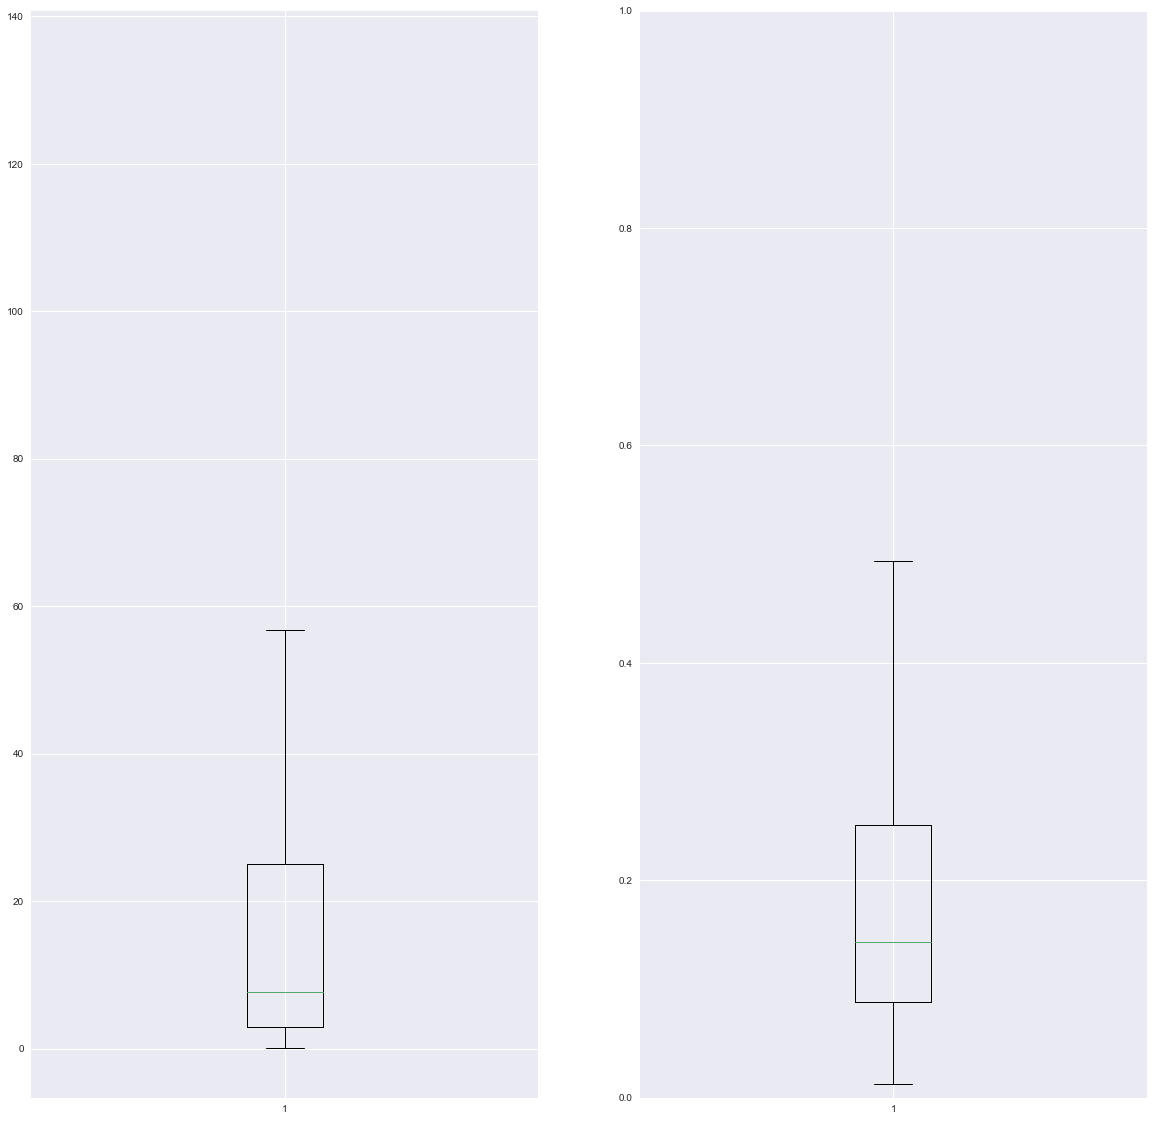

In [82]:
#PLotting the error box plots 
size=(20,20)
fig,ax = plt.subplots(figsize=size)
plt.subplot(1, 2, 1)
plt.boxplot(errors_f)

plt.subplot(1, 2, 2)
plt.ylim(0,1)
plt.boxplot(errors_nf)

In [36]:
#Experimentation to fix a threshold for classification of a transaction into fraud or non-fraud
print(sum(errors_nf>np.median(errors_f)))
print(sum(errors_f<np.median(errors_f)))
print(sum(errors_f<np.median(errors_nf)))
sum(errors_nf>np.median(errors_nf))

18
192
21


7971

In [37]:
print(errors_nf.shape)
print(errors_f.shape)

(15942,)
(385,)


In [38]:
print(predictions_nf.shape)
print(predictions_f.shape)

(15942, 29)
(385, 29)


In [41]:
test_pred = autoencoder.predict(X_test[:,:29])
test_recon  = (((test_pred-X_test)**2).mean(-1))

train_pred = autoencoder.predict(X_train[:,:29])
mean_recon = (((train_pred - X_train)**2).mean(-1).mean())

from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

scores_f1 = []
thres = []

th = 0
for i in range(100):
    th+=0.1
    fraud = (test_recon>mean_recon+th)
    scores_f1.append(f1_score(y_test,fraud))
    thres.append(th+mean_recon)
    

2.82945941313


array([[15890,    52],
       [   89,   296]])

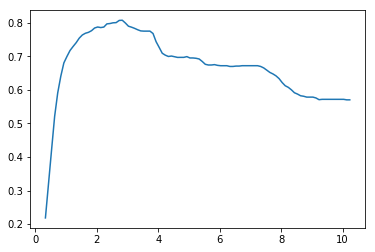

In [43]:
plt.plot(thres, scores_f1)

print(thres[np.array(scores_f1).argmax()])

fraud = (test_recon>thres[np.array(scores_f1).argmax()])

confusion_matrix(y_test, fraud)

In [77]:
eval_pred = autoencoder.predict(X_eval[:,:29])
eval_recon  = (((eval_pred-X_eval[:,:29])**2).mean(-1))
fraud_eval = (eval_recon>thres[np.array(scores_f1).argmax()])

In [78]:
confusion_matrix(X_eval[:,29], fraud_eval)

array([[3968,    7],
       [  21,   86]])

In [84]:
print(recall_score(X_eval[:,29],fraud_eval))
print(precision_score(X_eval[:,29],fraud_eval))
print(accuracy_score(X_eval[:,29],fraud_eval))

0.803738317757
0.924731182796
0.993140617344


In [85]:
print(recall_score(y_test, fraud))
print(precision_score(y_test, fraud))
print(accuracy_score(y_test, fraud))

0.794805194805
0.990291262136
0.994977644393
